In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.image as mpimg
import netCDF4 as nc
import scipy.stats as ss
import scipy.odr
from scipy.odr import *
from scipy import odr
import math
import matplotlib.colors as mcolors

In [2]:
import numpy as np
import scipy as scipy
import scipy.odr as odr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

here is where i download uf, tasmin and tasmax. tasmin and tasmax are for the summer months JJA

In [3]:
UF = xr.open_dataset('/Users/lucy-paigewillows/Documents/Documents – Lucy-Paige’s MacBook Air/Final Project /urban_fraction_osgb.nc')
uf= UF.urban_fraction

In [4]:
ds = xr.open_dataset('/Users/lucy-paigewillows/Documents/Documents – Lucy-Paige’s MacBook Air/Final Project /TasmaxJJA')
tasmax=ds.tasmax

In [5]:
dq = xr.open_dataset('/Users/lucy-paigewillows/Documents/Documents – Lucy-Paige’s MacBook Air/Final Project /TasminJJA_new')
tasmin=dq.tasmin

Indicate on the map where each city is located

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


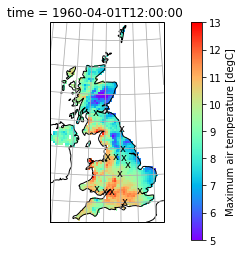

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.OSGB())
im=ds.tasmax[0,:].plot.imshow(ax=ax, cmap='rainbow')
ax.coastlines(resolution='50m')
plt.annotate('x', (530014.2652982875, 180335.058312868))#london
plt.annotate('x', (383940.2552807309, 389267.3727985183))#manchester
plt.annotate('x',(407566.4395503026, 287568.6546917738))#birmingham
plt.annotate('x',(429781.86617848545, 437174.3543250195))#Leeds
plt.annotate('x',(441998.78584024886, 112451.29836639509))#South Hampton
plt.annotate('x',(334152.16256464575, 390588.3408484054))#liverpool
plt.annotate('x',(424548.9423749563, 564887.268469748))#newcastle
plt.annotate('x',(456663.8495134988, 340065.3633503547))#nottingham
plt.annotate('x',(435352.86630521144, 387256.55756918486))#sheffield
plt.annotate('x', (359240.81924981874, 173055.35408234101))#bris
plt.annotate('x',(325899.2874989599, 673996.2534252922))#edinburgh
plt.annotate('x', (259185.9618498749, 665374.1429173797))#glasgow
plt.annotate('x', (265544.9459092346, 193191.5071913948))#swansea
plt.annotate('x', (318219.26578360604, 176506.94585818233))#cardiff
im.set_clim(5,13)
ax.gridlines()

call each 5x5 box for each city (found from other notebook)

In [26]:
uf_clim_london = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(490000,550000)).sel(projection_y_coordinate= slice(160000,210000)).mean(dim='time')
uf_clim_glasgow = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(240000,300000)).sel(projection_y_coordinate= slice(640000,690000)).mean(dim='time')
uf_clim_newcastle = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(390000,440000)).sel(projection_y_coordinate= slice(530000,590000)).mean(dim='time')
uf_clim_birmingham = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(370000,430000)).sel(projection_y_coordinate= slice(270000,320000)).mean(dim='time')
uf_clim_liverpool = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(330000,350000)).sel(projection_y_coordinate= slice(360000,420000)).mean(dim='time')
uf_clim_manchester = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(350000,410000)).sel(projection_y_coordinate= slice(370000,430000)).mean(dim='time')
uf_clim_sheffield = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(410000,470000)).sel(projection_y_coordinate= slice(360000,420000)).mean(dim='time')
uf_clim_nottingham = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(420000,480000)).sel(projection_y_coordinate= slice(320000,380000)).mean(dim='time')
uf_clim_cardiff = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(280000,340000)).sel(projection_y_coordinate= slice(170000,230000)).mean(dim='time')
uf_clim_leeds = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(400000,450000)).sel(projection_y_coordinate= slice(410000,460000)).mean(dim='time')
uf_clim_bristol = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(340000,390000)).sel(projection_y_coordinate= slice(150000,200000)).mean(dim='time')
uf_clim_SH = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(400000,450000)).sel(projection_y_coordinate= slice(100000,150000)).mean(dim='time')
uf_clim_edinburgh = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(280000,330000)).sel(projection_y_coordinate= slice(650000,710000)).mean(dim='time')
uf_clim_swansea = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(240000,300000)).sel(projection_y_coordinate= slice(190000,250000)).mean(dim='time')

here is a loop that first of all orders the UF values from smallest to largest, then takes out the nan and 0 values and then choses the lowest c[0] ad c[1] and the hightest c[-2] and c[-1] values. These are then plugged in to get the x (p_x_c) and y (p_y_c) projection coordinates, which are then plugged in to bring out the respective taxmax values. Urban Intensity is then calculated

In [29]:
gridbox=[uf_clim_london,uf_clim_glasgow,  uf_clim_newcastle, uf_clim_birmingham,uf_clim_liverpool, uf_clim_manchester,uf_clim_sheffield, uf_clim_nottingham,uf_clim_cardiff, uf_clim_leeds,uf_clim_bristol, uf_clim_SH,uf_clim_edinburgh,uf_clim_swansea ]
city=['london','glasgow','newcastle','birmingham','liverpool','manchester','sheffield','nottingham','cardiff','leeds','bristol','southhampton', 'edinburgh', 'swansea']
UI_cities_tasmax=[]
urban_tasmax=[]
rural_tasmax=[]
for i in range(14):
    city=['london','glasgow','newcastle','birmingham','liverpool','manchester','sheffield','nottingham','cardiff','leeds','bristol','southhampton', 'edinburgh', 'swansea']
    gridbox=[uf_clim_london,uf_clim_glasgow,  uf_clim_newcastle, uf_clim_birmingham,uf_clim_liverpool, uf_clim_manchester,uf_clim_sheffield, uf_clim_nottingham,uf_clim_cardiff, uf_clim_leeds,uf_clim_bristol, uf_clim_SH, uf_clim_edinburgh,uf_clim_swansea]
    gridbox=gridbox[i]
    city=city[i]
    a=gridbox
    urban_value=a.values
    urban_value[np.isnan(urban_value)]=0
    urban_values=urban_value[urban_value!=0]
    urban_values_combined=urban_values.flatten()
    c=np.sort(urban_values_combined)
    urban_fractions_london=[c[0],c[1],c[-2],c[-1]]
    print('Urban Fractions',city,':', urban_fractions_london)
    p_x_c=[]
    p_y_c=[]
    x=[0,1,-2,-1]
    for j in x:
        value=c[j]
        x_coord=a.coords['projection_x_coordinate'].values[np.where(a==value)[1][0]]
        y_coord=a.coords['projection_y_coordinate'].values[np.where(a==value)[0][0]]
        p_x_c.append(x_coord)
        p_y_c.append(y_coord)
    print('x_coordinates',city, p_x_c)
    print('y_coordinates',city, p_y_c)
    tasmax_city_h1 = tasmax.sel(projection_x_coordinate=p_x_c[3], projection_y_coordinate=p_y_c[3], method='nearest')
    tasmax_city_h2 = tasmax.sel(projection_x_coordinate=p_x_c[2], projection_y_coordinate=p_y_c[2], method='nearest')
    tasmax_city_l1 = tasmax.sel(projection_x_coordinate=p_x_c[0], projection_y_coordinate=p_y_c[0], method='nearest')
    tasmax_city_l2 = tasmax.sel(projection_x_coordinate=p_x_c[1], projection_y_coordinate=p_y_c[1], method='nearest')
    tasmax_city_urban= (tasmax_city_h1+ tasmax_city_h2)/2
    tasmax_city_rural= (tasmax_city_l1+ tasmax_city_l2)/2
    urban_tasmax.append(tasmax_city_urban)
    rural_tasmax.append(tasmax_city_rural)
    UI_city= tasmax_city_urban- tasmax_city_rural
    UI_cities_tasmax.append(UI_city)

Urban Fractions london : [0.06877282639196992, 0.1638222936807044, 0.8767075489332187, 0.9196728134941788]
x_coordinates london [546000.0, 546000.0, 534000.0, 522000.0]
y_coordinates london [162000.0, 210000.0, 186000.0, 186000.0]
Urban Fractions glasgow : [0.00048769418593359615, 0.0013062726377437528, 0.3908943092189042, 0.3978165753935664]
x_coordinates glasgow [294000.0, 294000.0, 246000.0, 258000.0]
y_coordinates glasgow [654000.0, 642000.0, 678000.0, 666000.0]
Urban Fractions newcastle : [0.00023886812608401805, 0.0046091734720483096, 0.328667816601332, 0.429380621042366]
x_coordinates newcastle [390000.0, 402000.0, 426000.0, 426000.0]
y_coordinates newcastle [534000.0, 582000.0, 582000.0, 570000.0]
Urban Fractions birmingham : [0.03597215320104574, 0.04528774206207894, 0.6419926634593147, 0.6730227834262434]
x_coordinates birmingham [378000.0, 426000.0, 390000.0, 402000.0]
y_coordinates birmingham [318000.0, 318000.0, 294000.0, 294000.0]
Urban Fractions liverpool : [0.0383144045

Here is finding the summer average for each year 

In [30]:
UI_london_yearly_tasmax= UI_cities_tasmax[0].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_glasgow_yearly_tasmax= UI_cities_tasmax[1].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_newcastle_yearly_tasmax= UI_cities_tasmax[2].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_birmingham_yearly_tasmax=UI_cities_tasmax[3].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_liverpool_yearly_tasmax= UI_cities_tasmax[4].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_manchester_yearly_tasmax= UI_cities_tasmax[5].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_sheffield_yearly_tasmax= UI_cities_tasmax[6].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_nottingham_yearly_tasmax= UI_cities_tasmax[7].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_cardiff_yearly_tasmax=UI_cities_tasmax[8].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_leeds_yearly_tasmax= UI_cities_tasmax[9].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_bristol_yearly_tasmax= UI_cities_tasmax[10].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_SH_yearly_tasmax= UI_cities_tasmax[11].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_edinburgh_yearly_tasmax= UI_cities_tasmax[12].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_swansea_yearly_tasmax= UI_cities_tasmax[13].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')

Then here are the plots

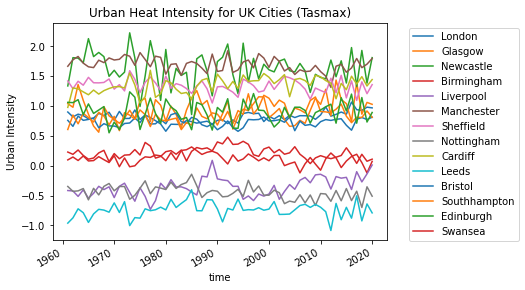

In [32]:
UI_london_yearly_tasmax.plot(label='London')
UI_glasgow_yearly_tasmax.plot(label='Glasgow')
UI_newcastle_yearly_tasmax.plot(label='Newcastle')
UI_birmingham_yearly_tasmax.plot(label='Birmingham')
UI_liverpool_yearly_tasmax.plot(label='Liverpool')
UI_manchester_yearly_tasmax.plot(label='Manchester')
UI_sheffield_yearly_tasmax.plot(label='Sheffield')
UI_nottingham_yearly_tasmax.plot(label='Nottingham')
UI_cardiff_yearly_tasmax.plot(label='Cardiff')
UI_leeds_yearly_tasmax.plot(label='Leeds')
UI_bristol_yearly_tasmax.plot(label='Bristol')
UI_SH_yearly_tasmax.plot(label='Southhampton')
UI_edinburgh_yearly_tasmax.plot(label='Edinburgh')
UI_swansea_yearly_tasmax.plot(label='Swansea')
plt.title('Urban Heat Intensity for UK Cities (Tasmax)')
plt.ylabel('Urban Intensity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


now for tasmin

In [33]:
gridbox=[uf_clim_london,uf_clim_glasgow,  uf_clim_newcastle, uf_clim_birmingham,uf_clim_liverpool, uf_clim_manchester,uf_clim_sheffield, uf_clim_nottingham,uf_clim_cardiff, uf_clim_leeds,uf_clim_bristol,uf_clim_edinburgh, uf_clim_swansea]
city=['london','glasgow','newcastle','birmingham','liverpool','manchester','sheffield','nottingham','cardiff','leeds','bristol','southhampton', 'edinburgh', 'swansea']
UI_cities_tasmin=[]
urban_tasmin=[]
rural_tasmin=[]
for i in range(14):
    city=['london','glasgow','newcastle','birmingham','liverpool','manchester','sheffield','nottingham','cardiff','leeds','bristol','southhampton','edinburgh', 'swansea']
    gridbox=[uf_clim_london,uf_clim_glasgow,  uf_clim_newcastle, uf_clim_birmingham,uf_clim_liverpool, uf_clim_manchester,uf_clim_sheffield, uf_clim_nottingham,uf_clim_cardiff, uf_clim_leeds,uf_clim_bristol, uf_clim_SH, uf_clim_edinburgh, uf_clim_swansea]
    gridbox=gridbox[i]
    city=city[i]
    a=gridbox
    urban_value=a.values
    urban_value[np.isnan(urban_value)]=0
    urban_values=urban_value[urban_value!=0]
    urban_values_combined=urban_values.flatten()
    c=np.sort(urban_values_combined)
    urban_fractions_london=[c[0],c[1],c[-2],c[-1]]
    print('Urban Fractions',city,':', urban_fractions_london)
    p_x_c=[]
    p_y_c=[]
    x=[0,1,-2,-1]
    for j in x:
        value=c[j]
        x_coord=a.coords['projection_x_coordinate'].values[np.where(a==value)[1][0]]
        y_coord=a.coords['projection_y_coordinate'].values[np.where(a==value)[0][0]]
        p_x_c.append(x_coord)
        p_y_c.append(y_coord)
    print('x_coordinates',city, p_x_c)
    print('y_coordinates',city, p_y_c)
    tasmin_city_h1 = tasmin.sel(projection_x_coordinate=p_x_c[3], projection_y_coordinate=p_y_c[3], method='nearest')
    tasmin_city_h2 = tasmin.sel(projection_x_coordinate=p_x_c[2], projection_y_coordinate=p_y_c[2], method='nearest')
    tasmin_city_l1 = tasmin.sel(projection_x_coordinate=p_x_c[0], projection_y_coordinate=p_y_c[0], method='nearest')
    tasmin_city_l2 = tasmin.sel(projection_x_coordinate=p_x_c[1], projection_y_coordinate=p_y_c[1], method='nearest')
    tasmin_city_urban= (tasmin_city_h1+ tasmin_city_h2)/2
    tasmin_city_rural= (tasmin_city_l1+ tasmin_city_l2)/2
    urban_tasmin.append(tasmin_city_urban)
    rural_tasmin.append(tasmin_city_rural)
    UI_city= tasmin_city_urban- tasmin_city_rural
    UI_cities_tasmin.append(UI_city)

Urban Fractions london : [0.06877282639196992, 0.1638222936807044, 0.8767075489332187, 0.9196728134941788]
x_coordinates london [546000.0, 546000.0, 534000.0, 522000.0]
y_coordinates london [162000.0, 210000.0, 186000.0, 186000.0]
Urban Fractions glasgow : [0.00048769418593359615, 0.0013062726377437528, 0.3908943092189042, 0.3978165753935664]
x_coordinates glasgow [294000.0, 294000.0, 246000.0, 258000.0]
y_coordinates glasgow [654000.0, 642000.0, 678000.0, 666000.0]
Urban Fractions newcastle : [0.00023886812608401805, 0.0046091734720483096, 0.328667816601332, 0.429380621042366]
x_coordinates newcastle [390000.0, 402000.0, 426000.0, 426000.0]
y_coordinates newcastle [534000.0, 582000.0, 582000.0, 570000.0]
Urban Fractions birmingham : [0.03597215320104574, 0.04528774206207894, 0.6419926634593147, 0.6730227834262434]
x_coordinates birmingham [378000.0, 426000.0, 390000.0, 402000.0]
y_coordinates birmingham [318000.0, 318000.0, 294000.0, 294000.0]
Urban Fractions liverpool : [0.0383144045

In [34]:
UI_london_yearly_tasmin= UI_cities_tasmin[0].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_glasgow_yearly_tasmin= UI_cities_tasmin[1].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_newcastle_yearly_tasmin= UI_cities_tasmin[2].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_birmingham_yearly_tasmin=UI_cities_tasmin[3].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_liverpool_yearly_tasmin= UI_cities_tasmin[4].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_manchester_yearly_tasmin= UI_cities_tasmin[5].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_sheffield_yearly_tasmin= UI_cities_tasmin[6].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_nottingham_yearly_tasmin= UI_cities_tasmin[7].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_cardiff_yearly_tasmin=UI_cities_tasmin[8].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_leeds_yearly_tasmin= UI_cities_tasmin[9].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_bristol_yearly_tasmin= UI_cities_tasmin[10].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_SH_yearly_tasmin= UI_cities_tasmin[11].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_edinburgh_yearly_tasmin= UI_cities_tasmin[12].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_swansea_yearly_tasmin= UI_cities_tasmin[13].sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')

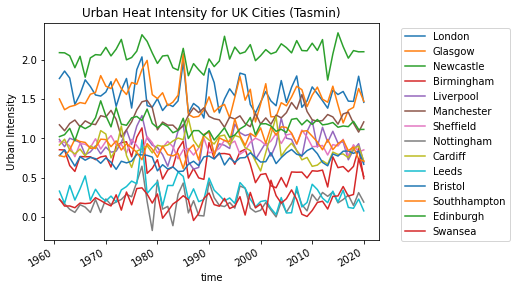

In [35]:
UI_london_yearly_tasmin.plot(label='London')
UI_glasgow_yearly_tasmin.plot(label='Glasgow')
UI_newcastle_yearly_tasmin.plot(label='Newcastle')
UI_birmingham_yearly_tasmin.plot(label='Birmingham')
UI_liverpool_yearly_tasmin.plot(label='Liverpool')
UI_manchester_yearly_tasmin.plot(label='Manchester')
UI_sheffield_yearly_tasmin.plot(label='Sheffield')
UI_nottingham_yearly_tasmin.plot(label='Nottingham')
UI_cardiff_yearly_tasmin.plot(label='Cardiff')
UI_leeds_yearly_tasmin.plot(label='Leeds')
UI_bristol_yearly_tasmin.plot(label='Bristol')
UI_SH_yearly_tasmin.plot(label='Southhampton')
UI_edinburgh_yearly_tasmin.plot(label='Edinburgh')
UI_swansea_yearly_tasmin.plot(label='Swansea')
plt.title('Urban Heat Intensity for UK Cities (Tasmin)')
plt.ylabel('Urban Intensity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

now for a comparison of tasmin and tasmax for each city 

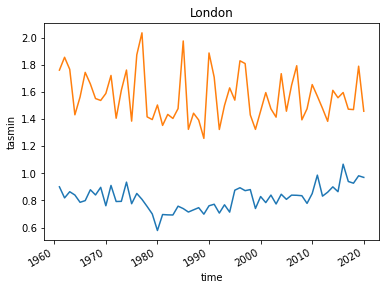

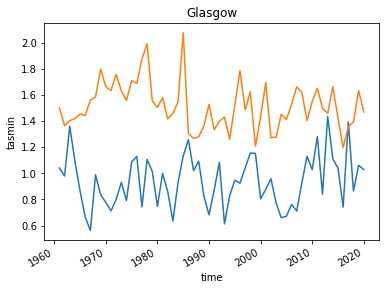

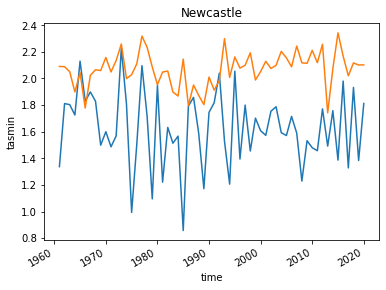

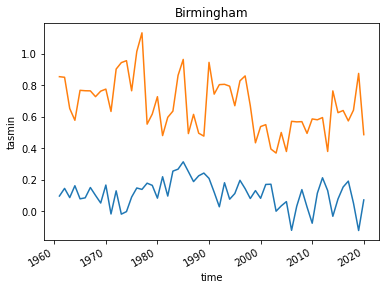

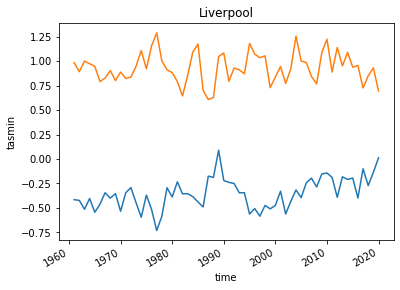

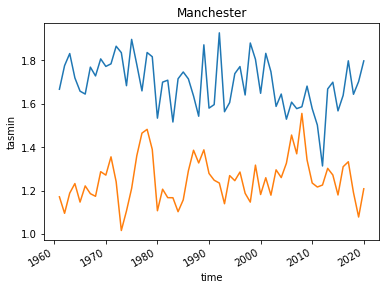

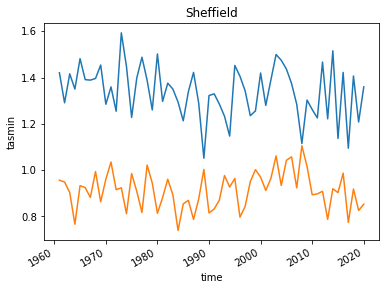

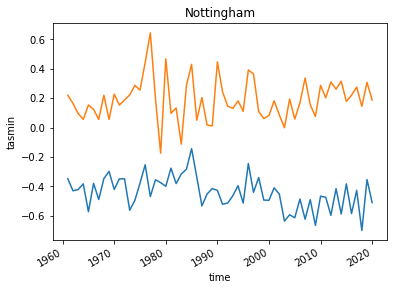

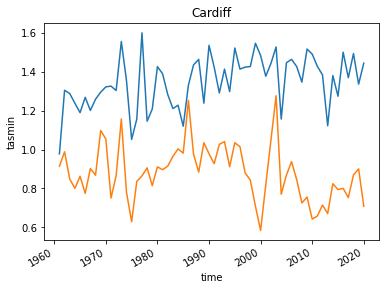

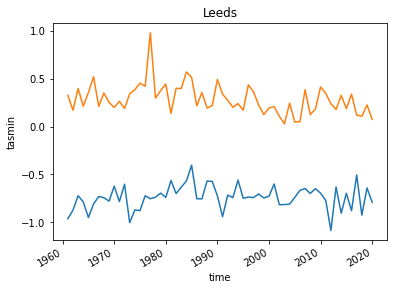

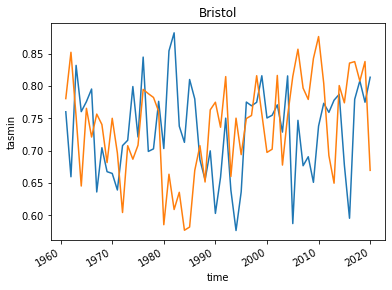

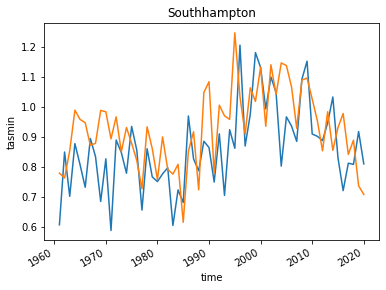

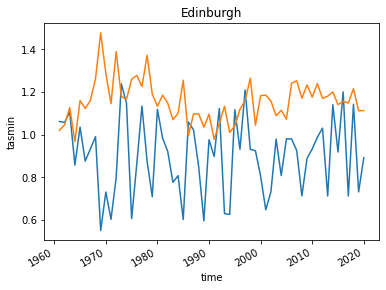

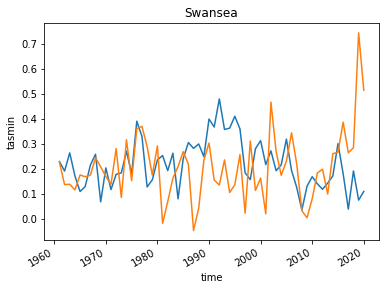

In [39]:
city_tasmax=[UI_london_yearly_tasmax, UI_glasgow_yearly_tasmax, UI_newcastle_yearly_tasmax, UI_birmingham_yearly_tasmax, UI_liverpool_yearly_tasmax, UI_manchester_yearly_tasmax, UI_sheffield_yearly_tasmax, UI_nottingham_yearly_tasmax, UI_cardiff_yearly_tasmax ,UI_leeds_yearly_tasmax, UI_bristol_yearly_tasmax, UI_SH_yearly_tasmax, UI_edinburgh_yearly_tasmax, UI_swansea_yearly_tasmax]
city_tasmin=[UI_london_yearly_tasmin, UI_glasgow_yearly_tasmin, UI_newcastle_yearly_tasmin, UI_birmingham_yearly_tasmin, UI_liverpool_yearly_tasmin, UI_manchester_yearly_tasmin, UI_sheffield_yearly_tasmin, UI_nottingham_yearly_tasmin, UI_cardiff_yearly_tasmin ,UI_leeds_yearly_tasmin, UI_bristol_yearly_tasmin, UI_SH_yearly_tasmin,UI_edinburgh_yearly_tasmin, UI_swansea_yearly_tasmin] 
city_name=['London','Glasgow','Newcastle','Birmingham','Liverpool','Manchester','Sheffield','Nottingham','Cardiff','Leeds','Bristol','Southhampton', 'Edinburgh', 'Swansea']
for i in range(14): 
    x1=city_tasmax[i]
    x2=city_tasmin[i]
    x3=city_name[i]
    plt.figure()
    x1.plot()
    x2.plot()
    plt.title(x3)

getting the average background temperature for tasmax and tasmin

In [45]:
c=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
average_tasmax=[]
average_tasmin=[]
for i in range(14): 
    x=c[i]
    average_temp= (urban_tasmax[x]+ rural_tasmax[x])/2
    average_temp_2= (urban_tasmin[x]+ rural_tasmin[x])/2
    average_tasmax.append(average_temp)
    average_tasmin.append(average_temp_2)

plotting the average temperaure against the urban heat island for each city

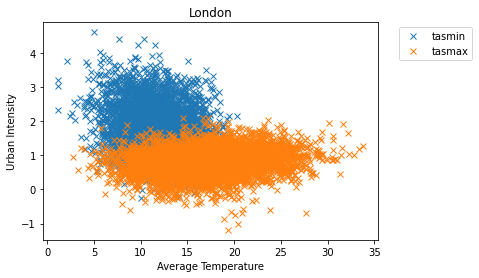

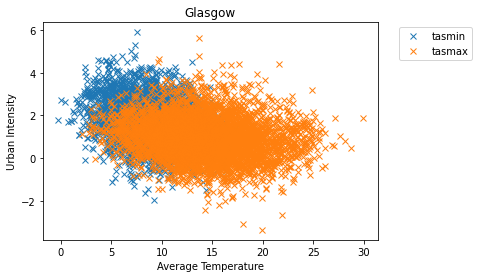

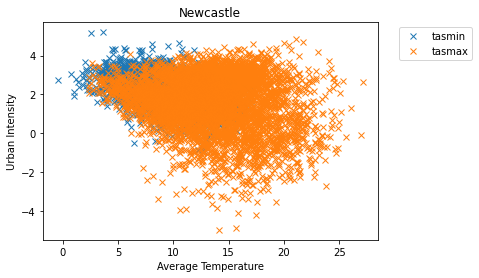

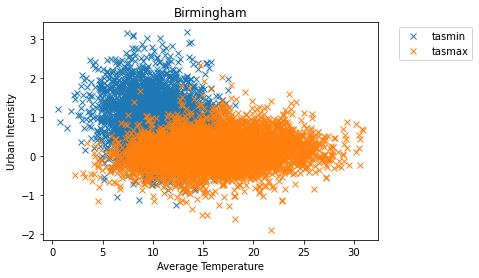

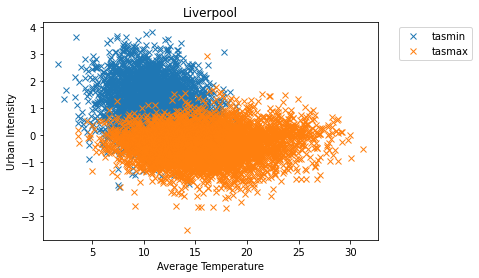

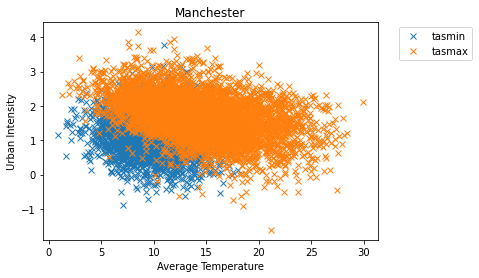

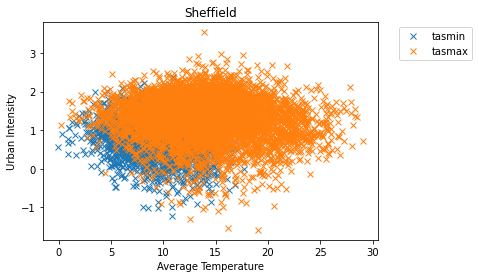

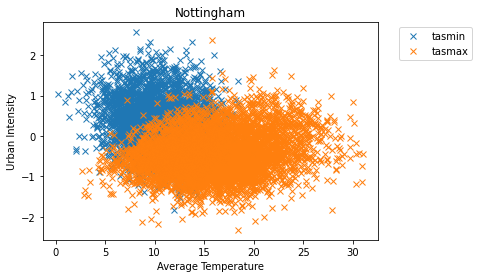

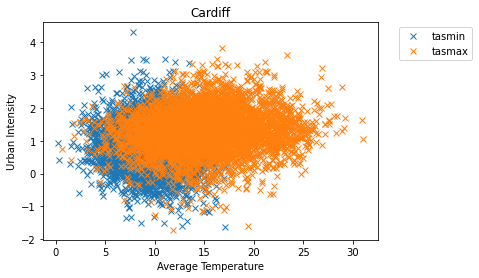

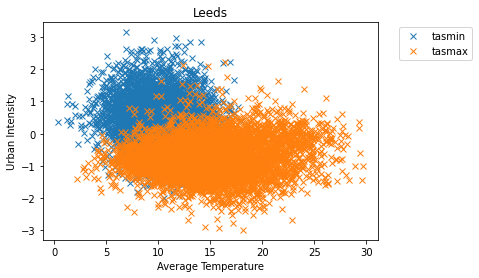

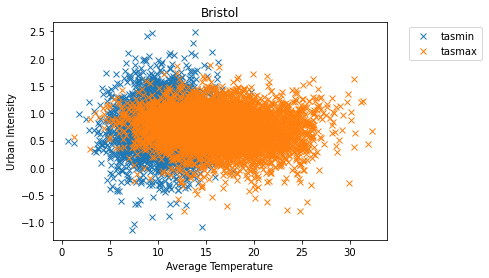

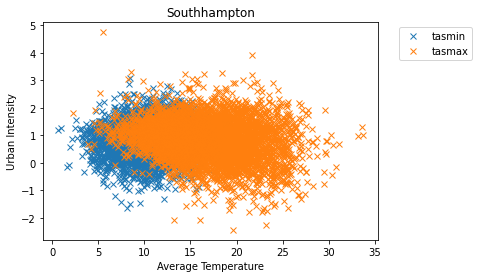

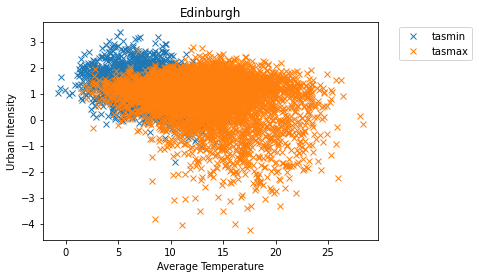

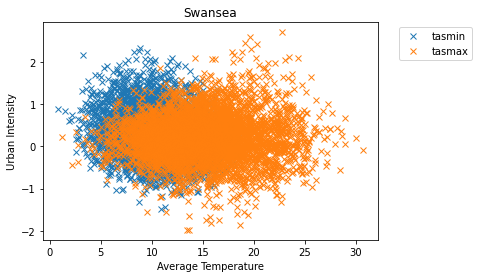

In [46]:
c=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
city_name=['London','Glasgow','Newcastle','Birmingham','Liverpool','Manchester','Sheffield','Nottingham','Cardiff','Leeds','Bristol','Southhampton', 'Edinburgh','Swansea']
for i in range(14): 
    x=c[i]
    x1=city_name[i]
    plt.plot(average_tasmin[x],UI_cities_tasmin[x], 'x', label='tasmin')
    plt.plot(average_tasmax[x],UI_cities_tasmax[x], 'x', label='tasmax')
    plt.title(x1)
    plt.xlabel('Average Temperature')
    plt.ylabel('Urban Intensity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

doning ordinary regression on these plots

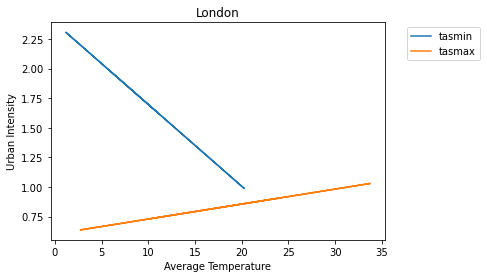

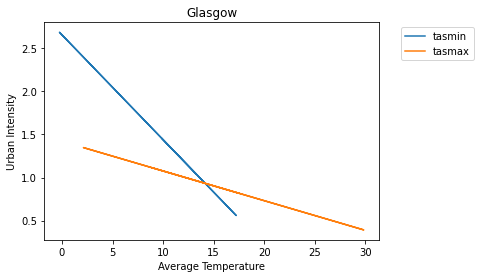

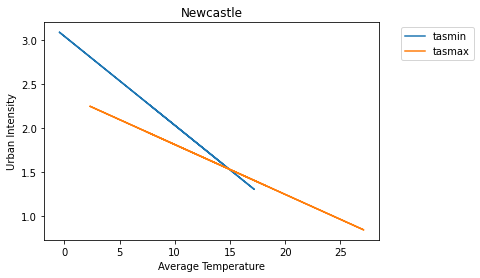

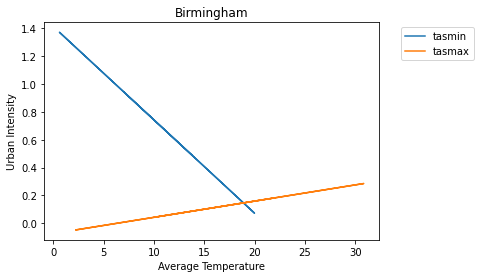

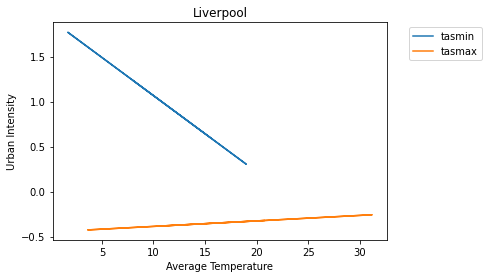

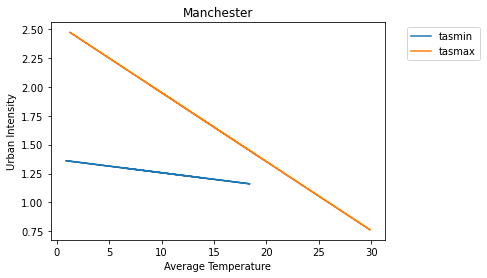

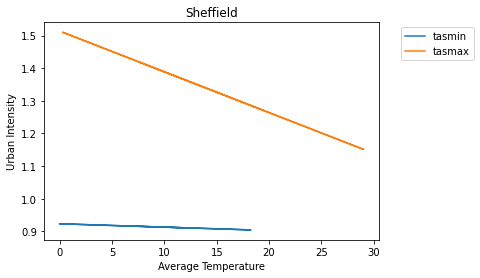

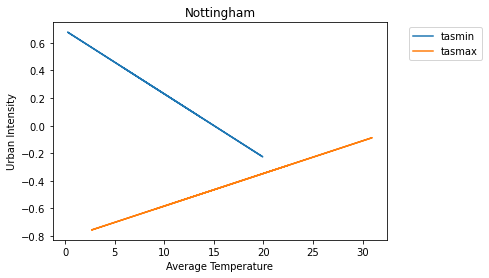

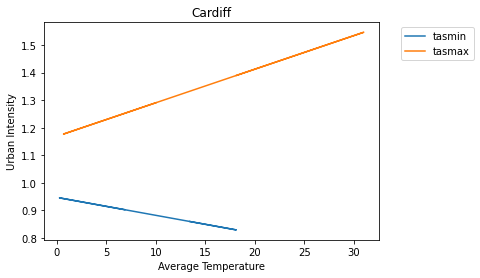

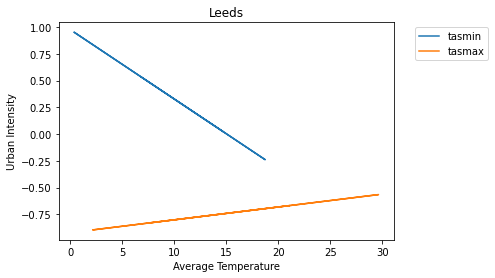

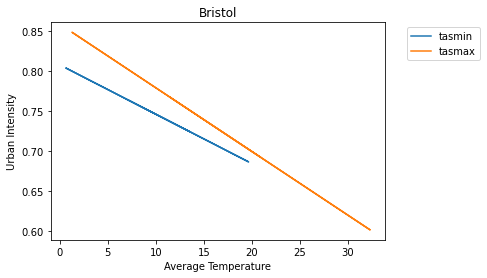

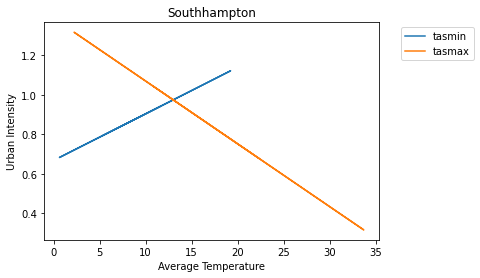

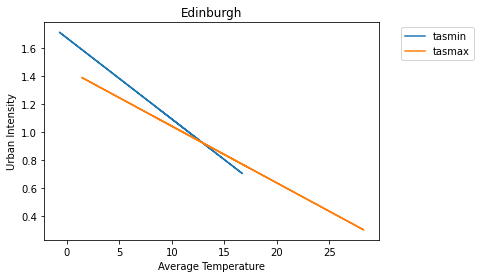

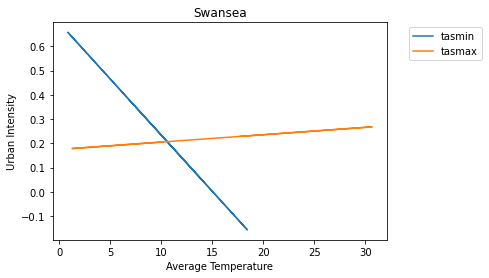

In [47]:
c=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
city_name=['London','Glasgow','Newcastle','Birmingham','Liverpool','Manchester','Sheffield','Nottingham','Cardiff','Leeds','Bristol','Southhampton', 'Edinburgh', 'Swansea']
for i in range(14): 
    x=c[i]
    x1=city_name[i]
    linreg=ss.stats.linregress(average_tasmin[x],UI_cities_tasmin[x])
    linreg2=ss.stats.linregress(average_tasmax[x],UI_cities_tasmax[x])
    plt.plot(average_tasmin[x], linreg[0]*average_tasmin[x]+linreg[1], label='tasmin')
    plt.plot(average_tasmax[x], linreg2[0]*average_tasmax[x]+linreg2[1], label='tasmax')
    plt.title(x1)
    plt.xlabel('Average Temperature')
    plt.ylabel('Urban Intensity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

doing rural vs urban for tasmin (as tasmin is the most important one)

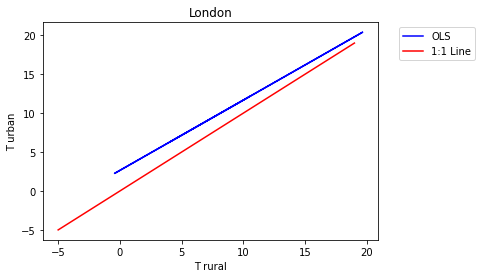

LinregressResult(slope=0.9026049585102492, intercept=2.647268021881848, rvalue=0.9660536086056095, pvalue=0.0, stderr=0.0032493771695546072)


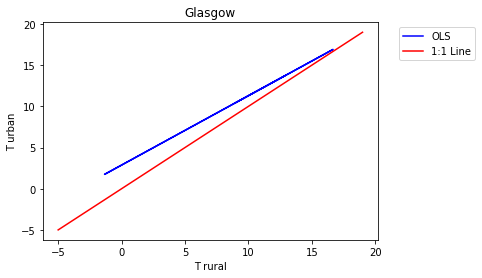

LinregressResult(slope=0.8420940430881169, intercept=2.8740813295499725, rvalue=0.9480577346482919, pvalue=0.0, stderr=0.0038036129436818957)


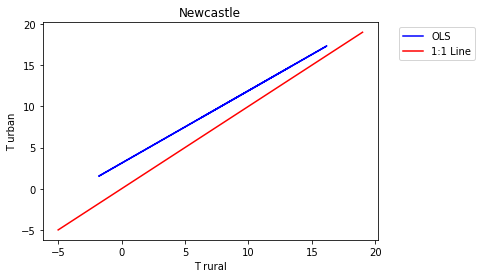

LinregressResult(slope=0.8795214048471769, intercept=3.105767211234869, rvalue=0.9717588014833052, pvalue=0.0, stderr=0.002875183306660389)


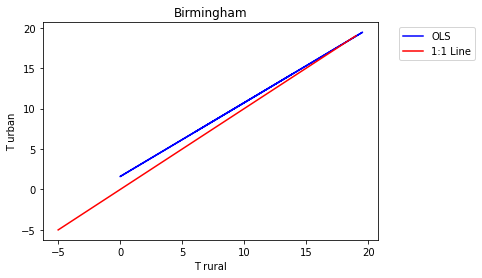

LinregressResult(slope=0.9128445483746864, intercept=1.6025197432685196, rvalue=0.975184578672977, pvalue=0.0, stderr=0.0027898690760665332)


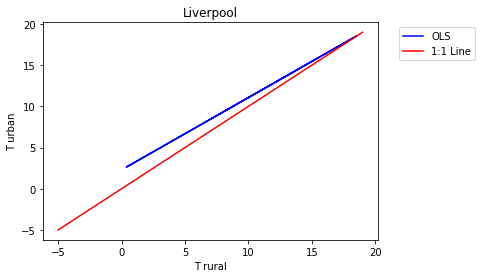

LinregressResult(slope=0.8772426541511189, intercept=2.2973603857097356, rvalue=0.9530437958674401, pvalue=0.0, stderr=0.0037524811187302515)


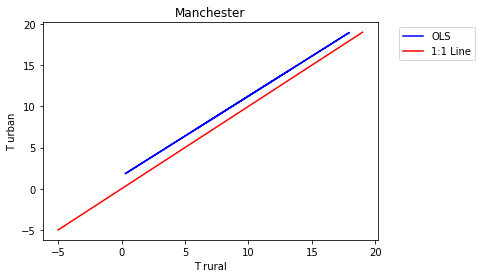

LinregressResult(slope=0.9700451775303243, intercept=1.547222153324217, rvalue=0.9810647836421071, pvalue=0.0, stderr=0.0025780296102326)


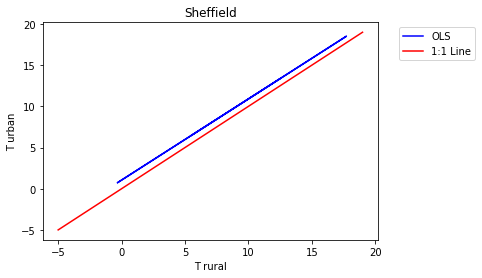

LinregressResult(slope=0.9853113232235898, intercept=1.0512470828150633, rvalue=0.9863172927848352, pvalue=0.0, stderr=0.002217054182213908)


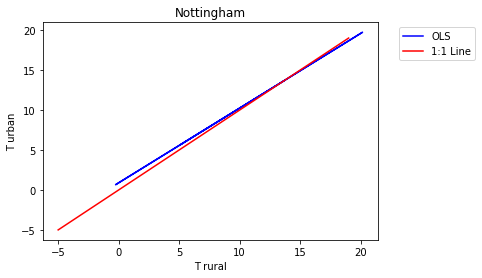

LinregressResult(slope=0.9347063956876585, intercept=0.8935760994310993, rvalue=0.9781049639716309, pvalue=0.0, stderr=0.0026772960777472076)


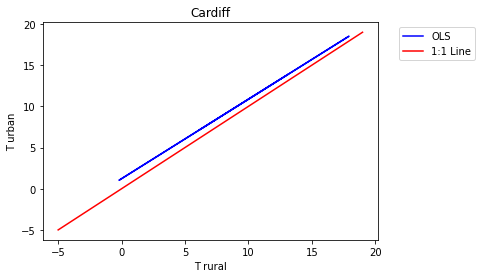

LinregressResult(slope=0.9646762960654766, intercept=1.2227512966226861, rvalue=0.9708868514846789, pvalue=0.0, stderr=0.0032040373758271744)


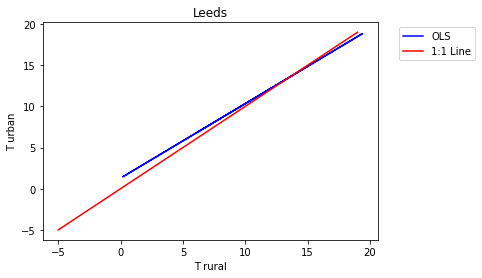

LinregressResult(slope=0.9045458318959937, intercept=1.2870783305198916, rvalue=0.964053788042585, pvalue=0.0, stderr=0.0033561527382180044)


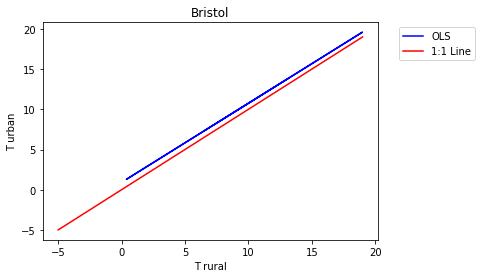

LinregressResult(slope=0.9838325677250105, intercept=0.9150778242465805, rvalue=0.9898860517240394, pvalue=0.0, stderr=0.0018981022766784196)


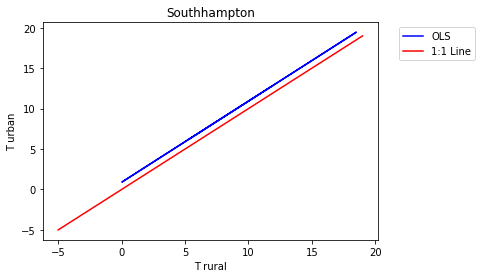

LinregressResult(slope=1.00324723805374, intercept=0.8928037264703708, rvalue=0.9800601477677126, pvalue=0.0, stderr=0.002738196141528105)


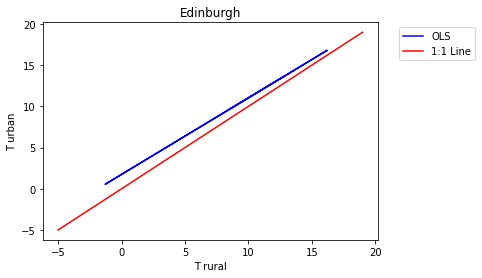

LinregressResult(slope=0.9291924276172862, intercept=1.7437881479988446, rvalue=0.9842390150476482, pvalue=0.0, stderr=0.0022475165942396082)


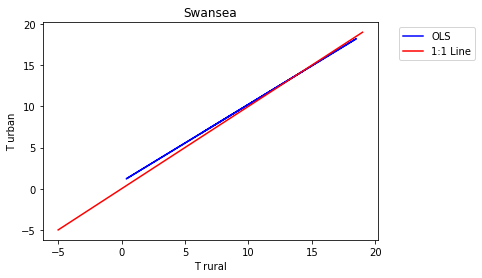

LinregressResult(slope=0.9378649996642998, intercept=0.8575454631520003, rvalue=0.9818407883488873, pvalue=0.0, stderr=0.0024394464391251773)


In [48]:
c=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
city_name=['London','Glasgow','Newcastle','Birmingham','Liverpool','Manchester','Sheffield','Nottingham','Cardiff','Leeds','Bristol','Southhampton','Edinburgh', 'Swansea']
x=np.array(range(-5,20))
y=np.array(range(-5,20))
for i in range(14): 
    z=c[i]
    x1=city_name[i]
    linreg=ss.stats.linregress(rural_tasmin[z],urban_tasmin[z])
    plt.plot(rural_tasmin[z], linreg[0]*rural_tasmin[z]+linreg[1], label='OLS', color='b')
    #plt.plot(rural_tasmin[z], urban_tasmin[z], xerr,yerr,'x', label='tasmin', color='y')
    plt.plot(x,y, color='r', label='1:1 Line')
    plt.title(x1)
    plt.xlabel('T rural')
    plt.ylabel('T urban')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    print(linreg)

now to do the UH intensity agaisnt backroun temperautre to tell you how it will change with temperature increase

In [54]:
c=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
data=[]
for i in range(14): 
    x=c[i]
    ratio= UI_cities_tasmin[x]/average_tasmin[x]
    data.append(ratio)

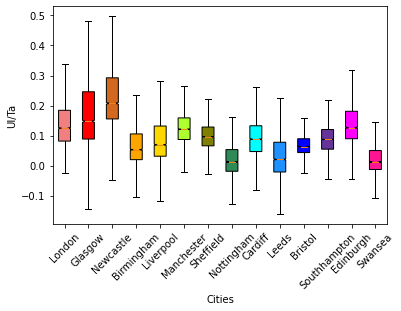

In [56]:
fig1, ax1 = plt.subplots()
#ax1.set_title('Ratio between UI and avergage temperature for tasmin')
box=ax1.boxplot(data,showfliers=False, notch=True, patch_artist=True)
colors = ['lightcoral','red', 'chocolate','orange', 'gold', 'greenyellow', 'olive','seagreen', 'aqua','dodgerblue', 'blue', 'rebeccapurple', 'fuchsia', 'deeppink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('Cities')
plt.ylabel('UI/Ta')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14],city_name, rotation=45)
plt.show()

grouping all of the data so we can do a line of best fit 

In [57]:
a= xr.concat(average_tasmin, dim='time', coords='minimal', compat='override')
b= xr.concat(UI_cities_tasmin, dim='time', coords='minimal', compat='override')

In [58]:
linreg=ss.stats.linregress(a,b)

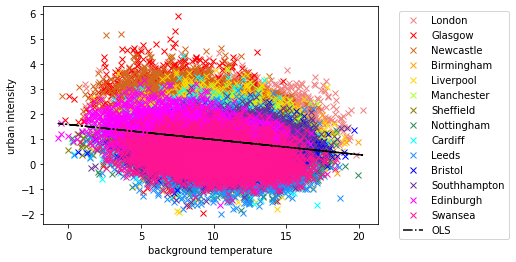

In [59]:
c=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
city_name=['London','Glasgow','Newcastle','Birmingham','Liverpool','Manchester','Sheffield','Nottingham','Cardiff','Leeds','Bristol','Southhampton', 'Edinburgh', 'Swansea']
colors = ['lightcoral','red', 'chocolate','orange', 'gold', 'greenyellow', 'olive','seagreen', 'aqua','dodgerblue', 'blue', 'rebeccapurple', 'fuchsia', 'deeppink']
for i in range(14): 
    x=c[i]
    x1=city_name[i]
    x2=colors[i]
    plt.plot(average_tasmin[x],UI_cities_tasmin[x], 'x', label=x1, color=x2 )
    plt.xlabel('background temperature')
    plt.ylabel('urban intensity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.plot(a, linreg[0]*a+linreg[1],'-.', label='OLS', color='k')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')